In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img=tf.keras.preprocessing.image.load_img("/content/ele.jpg",target_size=(224, 224))

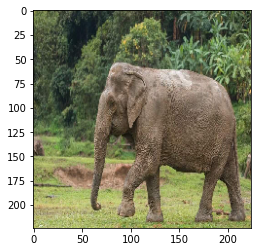

In [ ]:
plt.imshow(img)

In [ ]:
x=tf.keras.preprocessing.image.img_to_array(img)
shape=x.shape
x=np.expand_dims(x,axis=0)
x=tf.keras.applications.resnet50.preprocess_input(x)

In [ ]:
resnet=tf.keras.applications.resnet50.ResNet50(input_shape=shape)

102981632/102967424 [==============================] - 1s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
weights=resnet.layers[-1].get_weights()

In [ ]:
pic_model=tf.keras.Model(resnet.input,resnet.layers[-3].output)

In [ ]:
class_targ=np.argmax(resnet.predict(x)[0])

In [ ]:
feature_pic=pic_model.predict(x)[0]

In [ ]:
w=weights[0][:,class_targ]

In [ ]:
t=feature_pic.dot(w)

In [ ]:
import scipy

In [ ]:
t=scipy.ndimage.zoom(t,(32,32),order=1)

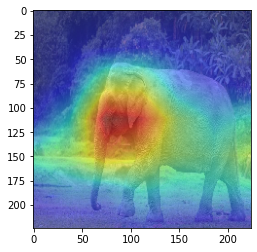

In [ ]:
plt.imshow(img,alpha=0.8)
plt.imshow(t,cmap="jet",alpha=0.5)